# MLG382 ASSIGNENT 2  [90 Marks] 
**Lecturer: _K. Igwe_**


# Predicting Beverage Quality
A beverage company produces some of their beverage locally while some are imported. The experts assign each beverage a score which is an indication of the beverage quality. A socre ranges from 1 to 10 where 1 is the lowest quality and 10 is the highest quality. According to the experts, a beverage with a score in the rage 1 to 6 (inclusive) is regarded as a low quality beverage while those with a score in the rage 7 to 10 (inclusive) is regarded as a high quality beverage.

### Aim
- Given the compositions (features) of the beverage, your aim is to train a LogisticRegression model to predict beverage quality as high_quality or low_quality.

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- Building a classification Model

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

#### Import the required libraries [3]

In [2048]:
#imports
import pandas as pd 
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline






#### Load the local-beverage.csv (the dataset provided) [2]

In [2049]:
# load data into panda array
df_bottles = pd.read_csv("local-beverage.csv")


#### Display information as well as a descriptive statistics of the features [5]

In [2050]:
#display top 5 and last 5 entries of the dataset
print('Dataset : ')
print(df_bottles,'\n')
print('Dataset info : ')
print('Is Null  : ')
#display the amount of records that are null
print(df_bottles.isnull().sum())
print('Data type  : ')
#display data types
print(df_bottles.dtypes)
print('Statistical values  : ')
#give statistical information about dataset
print(df_bottles.describe())


Dataset : 
      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0           NaN      0.700       0.00        1.9       0.68      0.076   
1           7.8      0.880       0.00        2.6       0.83      0.098   
2           7.8      0.760       0.04        2.3       0.98      0.092   
3          11.2      0.280       0.56        1.9       0.78      0.075   
4           7.4      0.700       0.00        1.9       0.54      0.076   
...         ...        ...        ...        ...        ...        ...   
1594        6.2      0.600       0.08        2.0       0.54      0.090   
1595        5.9      0.550       0.10        2.2       0.59      0.062   
1596        6.3      0.510       0.13        2.3       0.83      0.076   
1597        5.9      0.645       0.12        2.0       0.59      0.075   
1598        6.0      0.310       0.47        3.6       0.88      0.067   

      feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0          11.0       3

#### Handle missing data as you deem neccessary [5]

In [2051]:
#because there is not alot of records that contain NaN values relative to the size of the dataset i have decided that i will 
#inmute these records by means of removal 

print('Amount of records before removing NaN containing records : ')
print(len(df_bottles),"Records\n")
l=len(df_bottles)
df_bottles.dropna(inplace = True)# remove all rows that contain NaN values
print('Amount of records after removing NaN containing records : ')
print(len(df_bottles),"Records\n")
p=len(df_bottles)
g=l-p
print('records removed:',g)

Amount of records before removing NaN containing records : 
1599 Records

Amount of records after removing NaN containing records : 
1538 Records

records removed: 61


#### Correlate features against the label [7]

           feature_1     score
feature_1   1.000000  0.120313
score       0.120313  1.000000


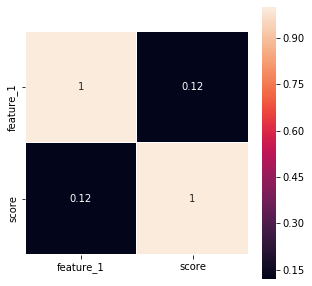

           feature_2     score
feature_2   1.000000 -0.384252
score      -0.384252  1.000000


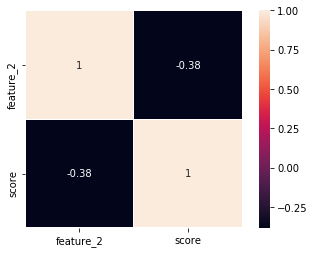

           feature_3     score
feature_3   1.000000  0.218847
score       0.218847  1.000000


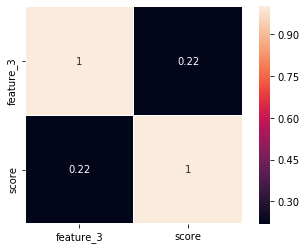

           feature_4     score
feature_4   1.000000  0.012234
score       0.012234  1.000000


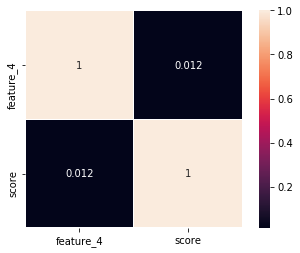

           feature_5     score
feature_5   1.000000  0.009177
score       0.009177  1.000000


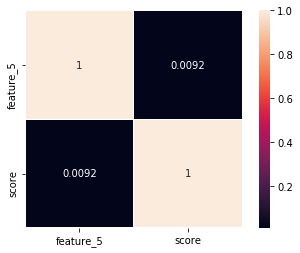

           feature_6     score
feature_6   1.000000 -0.124205
score      -0.124205  1.000000


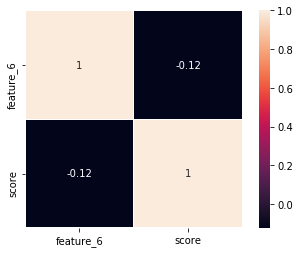

           feature_7     score
feature_7   1.000000 -0.054696
score      -0.054696  1.000000


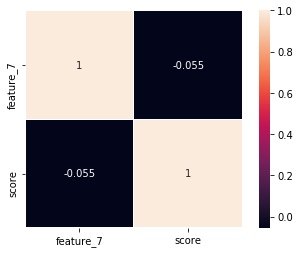

           feature_8     score
feature_8   1.000000 -0.186794
score      -0.186794  1.000000


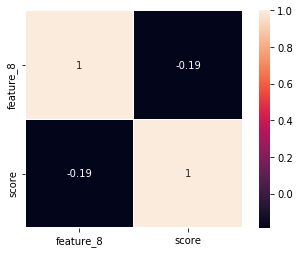

           feature_9     score
feature_9   1.000000 -0.008607
score      -0.008607  1.000000


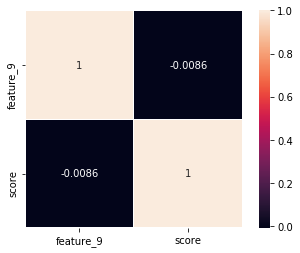

            feature_10     score
feature_10    1.000000 -0.179578
score        -0.179578  1.000000


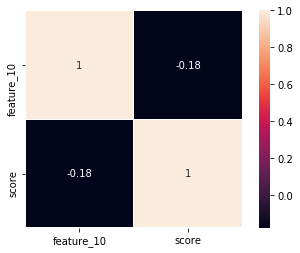

            feature_11   score
feature_11      1.0000 -0.0548
score          -0.0548  1.0000


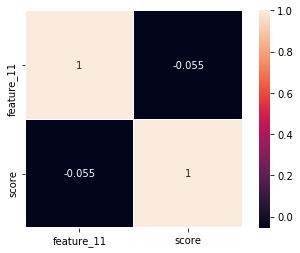

            feature_12     score
feature_12    1.000000 -0.017901
score        -0.017901  1.000000


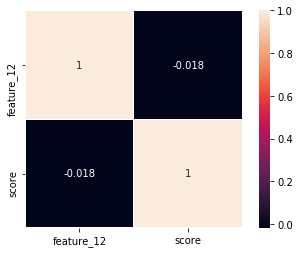

            feature_13     score
feature_13    1.000000  0.249392
score         0.249392  1.000000


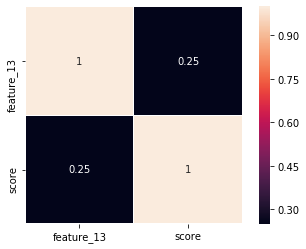

            feature_14     score
feature_14    1.000000  0.481112
score         0.481112  1.000000


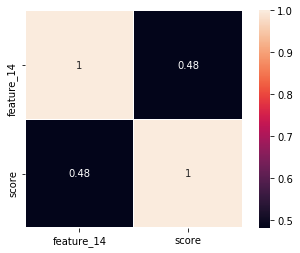

C:\Users\User-PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


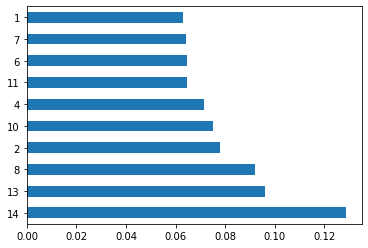

In [2052]:
# first i will display a corrolation matrix of each feature with the score lable
def plot_cor(x):
    plt.figure(figsize=(5,5))
    features=['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14',]
    for i in features:
        ax=sns.heatmap(x[[i,'score']].corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
        print(x[[i,'score']].corr())
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        plt.show()
plot_cor(df_bottles)

#feature importance graph
model = ExtraTreesClassifier()
x = df_bottles.iloc[:,:-1].values
y = df_bottles.iloc[:,-1].values
indexss=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_,index=indexss)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# i will make judgement off of the heat maps and feature importance

#### Select top 11 featurs for your classification [5]

In [2053]:
# AS seen in the previous node i can see that feature 9 feature 5 feature4 (other possible records that can be removed are
#feature 7 ,5 and 1 that are close in correlation with other features but are not exact and thus they will not be dropped) 
#are the the features with the lowest correlation as well as the some of the lowest feature importance with the 
#lable thus i am going to drop feature 9 , 5 and 4

#drops feature 9 5 and 4 from the dataset
df_bottles=df_bottles.drop(columns=['feature_9', 'feature_5','feature_4'])
print(df_bottles)

      feature_1  feature_2  feature_3  feature_6  feature_7  feature_8  \
1           7.8      0.880       0.00      0.098       25.0       67.0   
2           7.8      0.760       0.04      0.092       15.0       54.0   
3          11.2      0.280       0.56      0.075       17.0       60.0   
4           7.4      0.700       0.00      0.076       11.0       34.0   
5           7.4      0.660       0.00      0.075       13.0       40.0   
...         ...        ...        ...        ...        ...        ...   
1594        6.2      0.600       0.08      0.090       32.0       44.0   
1595        5.9      0.550       0.10      0.062       39.0       51.0   
1596        6.3      0.510       0.13      0.076       29.0       40.0   
1597        5.9      0.645       0.12      0.075       32.0       44.0   
1598        6.0      0.310       0.47      0.067       18.0       42.0   

      feature_10  feature_11  feature_12  feature_13  feature_14  score  
1        0.99680        3.20         

#### Show a bar plot of the Beverage quality scores where the hight of the bar is the number of beverage with a specific score [3] 

Text(0.5, 0, 'Score')

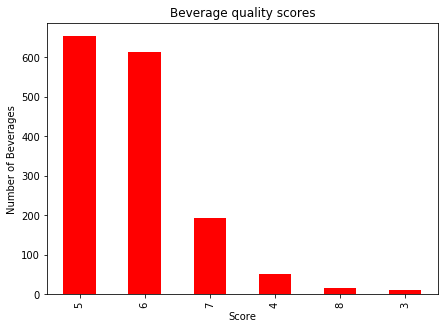

In [2054]:
# bar plot
df_bottles.score.value_counts().plot(kind='bar', figsize =(7,5), color='r')
plt.title("Beverage quality scores") 
plt.ylabel('Number of Beverages') 
plt.xlabel('Score')
# here we can see the largest amount of beverages are scored between 5 and 6 and this will lead to an inbalance in the data

#### Define a label named **high_quality** such that 1 implies a high quality beverage while 0 implies a low quality beverage [4]

In [2055]:
# [[a]] creates score01 column
score01=[]
column=df_bottles.iloc[:,-1] # get scores into and list of iets own
for item in column: # run this for loop to catogorize the beverages
    if (item >= 1) & (item <= 6):
        score01.append(0)
    elif (item >= 7) & (item <= 10):
        score01.append(1)
#insert the binarized score values into the the main dataset
df_bottles['high_quality']=score01



#### How many instances of high_quality and low quality beverage are in your dataset? [2]

In [2056]:
# _your answer here_
x=df_bottles[df_bottles['high_quality']==1]
y=df_bottles[df_bottles['high_quality']==0]
print('High quality beverages count:')
print(len(x))
print('Low quality beverages count:')
print(len(y))

High quality beverages count:
209
Low quality beverages count:
1329


#### Using any visualization of your choice, plot at least five features (or more) clearly showing the high and low quality beverage within the plot. Provide descriptions and insight gained from your plot [5]

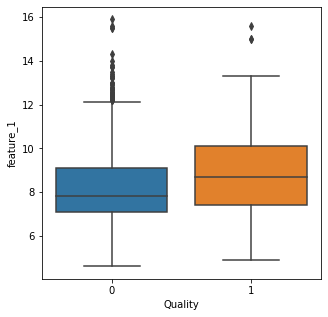

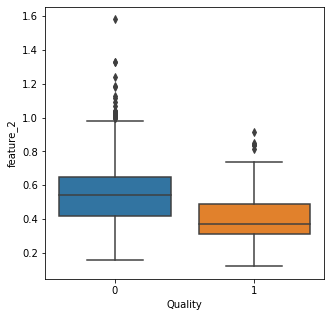

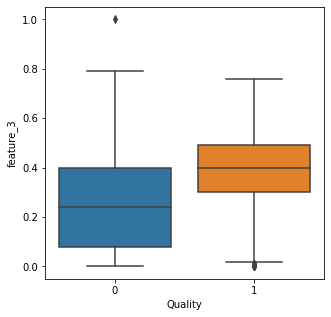

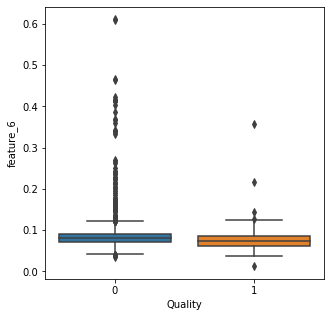

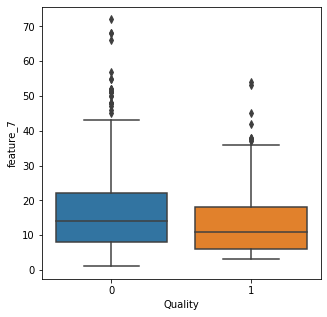

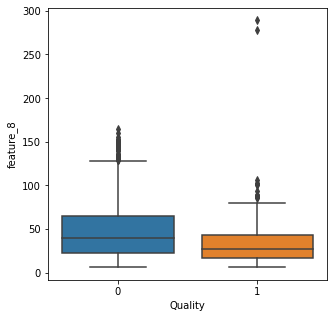

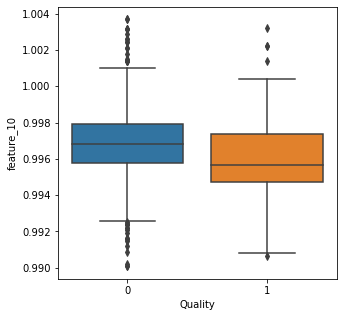

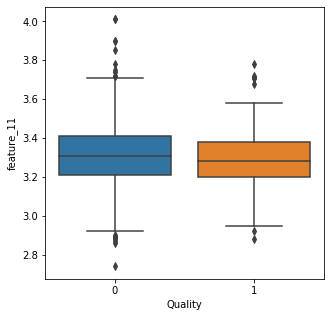

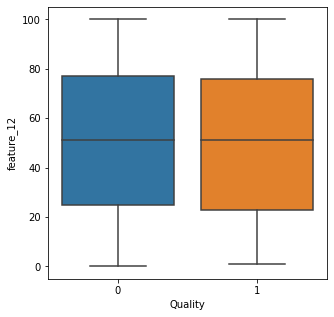

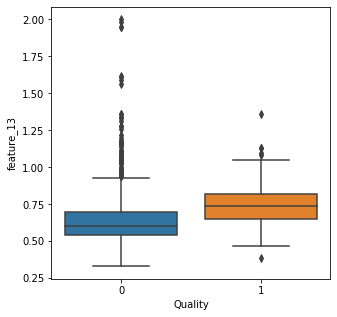

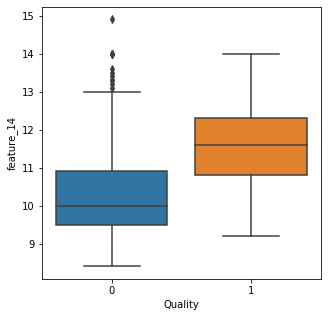

In [2057]:

def plotbox(x):
    features=['feature_1','feature_2','feature_3','feature_6','feature_7','feature_8','feature_10','feature_11','feature_12','feature_13','feature_14',]
    for i in features:
        plt.figure(figsize=(5,5))
        sns.boxplot(x['high_quality'], x[i]).set_xlabel("Quality", fontsize = 10)
        

plotbox(df_bottles)


details about insight
feature 1 :
here we can see that high quality beverages have a higher concentration values of feature 1 were the majority of high quality beverages have a largers feature 1 value than low quality beverages

feature 2 :
high quality bevrages has a higher consentration the lower feature 2 values are thus high quality beverages tend to have a lower feature 2 value than low quality beverages relating to a negative corrolation between them.

feature 13 :
here we can see that high quality beverages have a higher consitration values of feature 13 were the majority of high quality beverages have a largers feature 2 value than low quality beverages but we can also see that low quality beverages contains a lot of outliers which might cause some biase in the dataset

feature 14 :
here we can see a high correlation between between high quality beverage and features_14 values where high quality beverages is more likely the higher the feature 14 values is

general information:
when looking at the average around all the features we can se that the the features regard to the quality of the drink  we can see that the correlation between them are not to high, we can se that the variance between the feature value and quality is very large especially when looking at low quality beverages we can see a lot of outliers

## Logistic Regression
The logistic sigmoid function gives values in the range [0, 1], which can be used as probabilities for classification problems:

### Building a model
#### Separate x and y data [2]

In [2058]:
# _your code here_
df_bottles=df_bottles.drop(columns=['score'])
x = df_bottles.iloc[:,:-1].values
y = df_bottles.iloc[:,-1].values


# diveds 

#### Get the training and testing sets. Use 25% of the data for testing [5]

In [2059]:
# _your code here_
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('X_train')
print(X_train)
print('X_test')
print(X_test)
print('y_train')
print(y_train)
print('y_test')
print(y_test)

X_train
[[6.90e+00 5.40e-01 3.00e-01 ... 7.70e+01 1.18e+00 1.05e+01]
 [6.60e+00 5.60e-01 1.40e-01 ... 6.60e+01 6.20e-01 1.17e+01]
 [8.80e+00 4.70e-01 4.90e-01 ... 3.00e+01 6.00e-01 9.80e+00]
 ...
 [6.90e+00 1.09e+00 6.00e-02 ... 1.80e+01 4.30e-01 1.14e+01]
 [9.50e+00 5.90e-01 4.40e-01 ... 4.60e+01 6.30e-01 9.50e+00]
 [1.04e+01 5.75e-01 6.10e-01 ... 8.80e+01 6.90e-01 9.00e+00]]
X_test
[[5.00e+00 1.02e+00 4.00e-02 ... 7.10e+01 4.80e-01 1.05e+01]
 [6.60e+00 5.00e-01 0.00e+00 ... 3.90e+01 5.50e-01 1.23e+01]
 [8.10e+00 7.80e-01 1.00e-01 ... 1.50e+01 4.90e-01 9.50e+00]
 ...
 [6.60e+00 5.80e-01 0.00e+00 ... 6.50e+01 6.80e-01 1.14e+01]
 [9.20e+00 5.40e-01 3.10e-01 ... 3.30e+01 5.60e-01 1.09e+01]
 [6.20e+00 3.60e-01 2.40e-01 ... 1.50e+01 5.70e-01 1.17e+01]]
y_train
[0 1 0 ... 0 0 0]
y_test
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0

#### Rescale all numerical feature appropriately [4]

In [2060]:
# _your code here_

sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:,:])
X_test[:, :] = sc.transform(X_test[:,:])

 #### Build and train  a Logistic Regression  model [5]

In [2061]:
# _your code here_
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Make predictions on the test set [5]

In [2062]:
# _your code here_
# Returns a list of predicted classes - one prediction for every data point
predictions = model.predict(X_test)
# For every data point, returns a list of probabilities of each class
probabilities = model.predict_proba(X_test)
# prediction
y_pred = model.predict(X_test)
print("sample table of 30 predictions :")
y_act_y_pre = pd.DataFrame({" Actual": y_test[:30],"Predicted": y_pred[:30]})
print(y_act_y_pre)
#gives scoreing on the predictions
print("sample table of 30 predictions :")
print("accuracy: ",accuracy_score(y_test, y_pred))
print("recall: ",recall_score(y_test, y_pred))
print("precision: ",precision_score(y_test, y_pred))
print("precision: ",f1_score(y_test, y_pred))

sample table of 30 predictions :
     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
5         0          0
6         0          0
7         0          0
8         0          0
9         0          0
10        1          0
11        0          0
12        0          0
13        0          0
14        0          0
15        0          0
16        0          0
17        0          1
18        0          0
19        0          0
20        0          0
21        0          0
22        0          0
23        0          0
24        0          0
25        0          0
26        1          0
27        0          0
28        0          0
29        0          1
sample table of 30 predictions :
accuracy:  0.8805194805194805
recall:  0.3125
precision:  0.5357142857142857
precision:  0.39473684210526316


#### Evaluate predictions using:
1. A confusion matrix to see how the model's predictions align with the actual class labels.**[10]**
2. Accuracy to tell how many the model got right. **[5]**

confusion matrix

Predicted    0   1
Actual            
0          324  13
1           33  15
0.8805194805194805
0.8805194805194805


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       337
           1       0.54      0.31      0.39        48

    accuracy                           0.88       385
   macro avg       0.72      0.64      0.66       385
weighted avg       0.86      0.88      0.87       385



Text(0.5, 1.0, 'ROC curve')

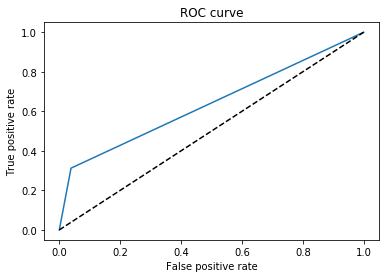

In [2063]:

print('confusion matrix\n')
print(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted']))
print(accuracy_score(y_test, y_pred))

y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')


#### Provide comments on the performance of your model [10]

In [2064]:
#Precision
    #-The confusion matrix we can see that the model tends to predict with very high precision when predicting
    #low quality bevrages and a low precision when predicting high quality beverages
    
    #-this causes the model to more accurately predict 1's more than 0's
# general
    # in general because the model struggles to predict high quality beverages all of the accuracy metrics will pale in
    # comparison than  those of the low quality beverages
    
#amount of data
    #- from the data provided to we can se that data labels are skewed towards low quality beverages which in return will cause 
    # the model the be better fitted to predict low quality beverages because there is a much larger testing pool of which the 
    # model can predict from

#### BONUS : Fine tune the model and provide additional insight of your choice [8] 

Original
Accuracy: 0.590 (0.109)
Fine tuned
Accuracy: 0.566 (0.092)


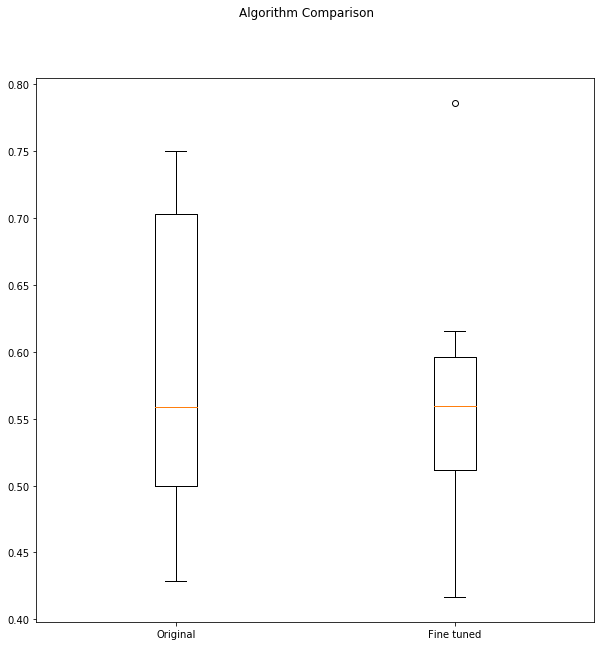

In [2065]:
# here i am comparing the precision of my original modle and fine tuned model and here i can see by adding weight to the model
# im am trying to overcome the class imbalance by increasing the weight of the high quality beverages which on avrage lowers 
# the variance of the presision of 1's which makes the modle more effective
# class_weight={1:1.5,0:1}
models =[]

models.append(('Original',LogisticRegression()))
models.append(('Fine tuned',LogisticRegression(class_weight={1:1.5,0:1})))

#kfold for original model
score=[]
index=[]

for name,model in models:
    cv = KFold(n_splits=10, shuffle=True, random_state=20)
    results = cross_val_score(model,X_train, y_train, scoring='precision',cv=cv, n_jobs=-1)
    print(name)
    print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))
    index.append(name)
    score.append(results)


fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(score)
ax.set_xticklabels(index)
plt.show()





